In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import re,string,unicodedata
import nltk
nltk.download('stopwords')
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
# from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC 
from sklearn import svm

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/1ccc8559-57be-47da-9fe8-
[nltk_data]     0174fa5d6e75/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df = pd.read_csv("IMDB Dataset.csv")  

In [7]:
# We analyze the dataset
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [9]:
df.value_counts('sentiment')

sentiment
negative    25000
positive    25000
Name: count, dtype: int64

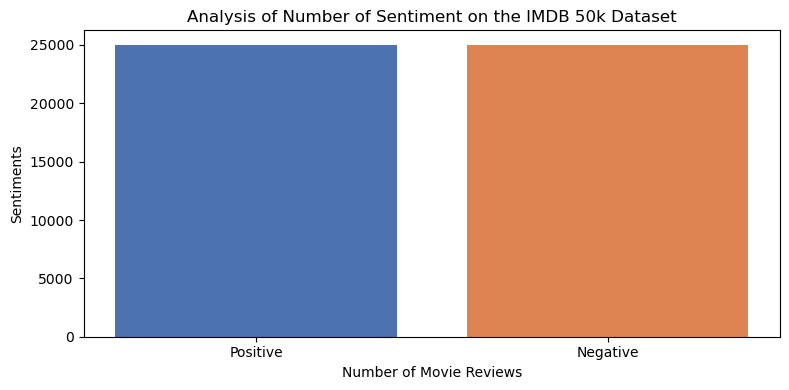

In [11]:
colors = sns.color_palette('deep')

plt.figure(figsize=(8,4), tight_layout=True)
plt.bar(x=['Positive', 'Negative'],
        height=df.value_counts(['sentiment']),
        color=colors[:2])
plt.title('Analysis of Number of Sentiment on the IMDB 50k Dataset')
plt.xlabel('Number of Movie Reviews')
plt.ylabel('Sentiments')
plt.savefig('sentiment.png')
plt.show()


In [13]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    
    return text
#Apply function on review column
# df['review']=df['review'].apply(denoise_text)

#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column

# #removing the stopwords
# def remove_stopwords(text, is_lower_case=False):
#     tokens = tokenizer.tokenize(text)
#     tokens = [token.strip() for token in tokens]
#     if is_lower_case:
#         filtered_tokens = [token for token in tokens if token not in stopword_list]
#     else:
#         filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
#     filtered_text = ' '.join(filtered_tokens)    
#     return filtered_text

#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
# df['review']=df['review'].apply(simple_stemmer)



#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text


# remove stop-words and punctuations
def remove_stopwords(sentence):
    stop_words = set(stopwords.words('english'))
    sentence = sentence.lower()
    tokens = sentence.split()
    filtered_tokens = [token.strip(string.punctuation) for token in tokens if token.lower() not in stop_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [15]:
# Apply the preproprocessing pipeline to the dataframe
df['review']=df['review'].apply(denoise_text) # strip the html and remove square brackets

In [16]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [19]:
# Segmentation of dataset into 80% training and 20% test set

train,test = train_test_split(df,test_size =0.2,random_state=42)
train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']

In [21]:
#transformation of the data into numeric vectors using TF-IDF

tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)
# also fit the test_x_vector
test_x_vector = tfidf.transform(test_x)

In [22]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfidf.get_feature_names_out())

,00,000,00000000000,00000001,00001,00015,000dm,000s,001,003830,...,ünfaithful,üvegtigris,üzümcü,ýs,þorleifsson,þór,četvorka,żmijewski,יגאל,כרמון
39087,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30893,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45278,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16398,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13653,0.094609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44732,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38158,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
tf = TfidfVectorizer()
from sklearn.pipeline import Pipeline

In [27]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
model=Pipeline([('vectorizer',tf),('classifier',classifier)])

In [29]:
model.fit(train_x,train_y)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [31]:
ypred=model.predict(test_x)

In [37]:
# model score
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(ypred,test_y)

0.9007

[[4600  439]
 [ 554 4407]]


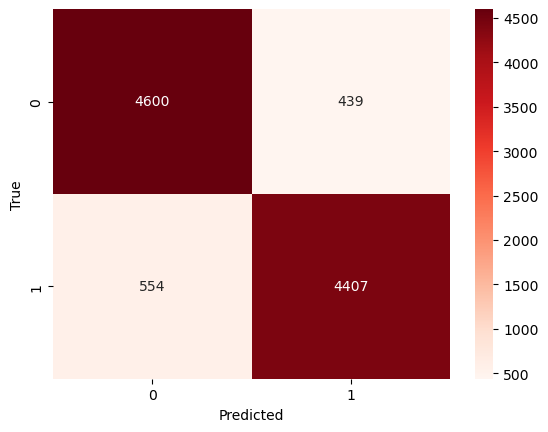

In [55]:
# confusion matrix
conf_matrix=confusion_matrix(test_y,ypred, labels = ['positive', 'negative'])
print(conf_matrix)

# plot confusion matrix as a heat map

sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [49]:
# f1 score
recall=A[0][0]/(A[0][0]+A[1][0])
precision=A[0][0]/(A[0][0]+A[0][1])
F1=2*recall*precision/(recall+precision)
print(F1)

0.8987457938207402


In [61]:
#Ploting the classification report
print(classification_report(test_y,ypred, labels = ['positive', 'negative']))

              precision    recall  f1-score   support

    positive       0.89      0.91      0.90      5039
    negative       0.91      0.89      0.90      4961

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

